        score  group  age
0    0.376811      0   57
1    0.639564      0   41
2    0.424429      0   61
3    0.176151      0   80
4    0.469309      0   39
..        ...    ...  ...
495  0.494881      0   58
496  0.725527      0   19
497  0.615781      0   40
498  0.655754      0   23
499  0.789607      0   10

[500 rows x 3 columns]
Models will be fit on full set of controls.


/opt/anaconda3/envs/norm_model_new/lib/python3.10/site-packages/pynm/pynm.py:513: UserWarning: The residuals are not Gaussian!
  warnings.warn("The residuals are not Gaussian!")


GAMLSS-RS iteration 1: Global Deviance = -925.0938 
GAMLSS-RS iteration 2: Global Deviance = -925.2722 
GAMLSS-RS iteration 3: Global Deviance = -925.2725 


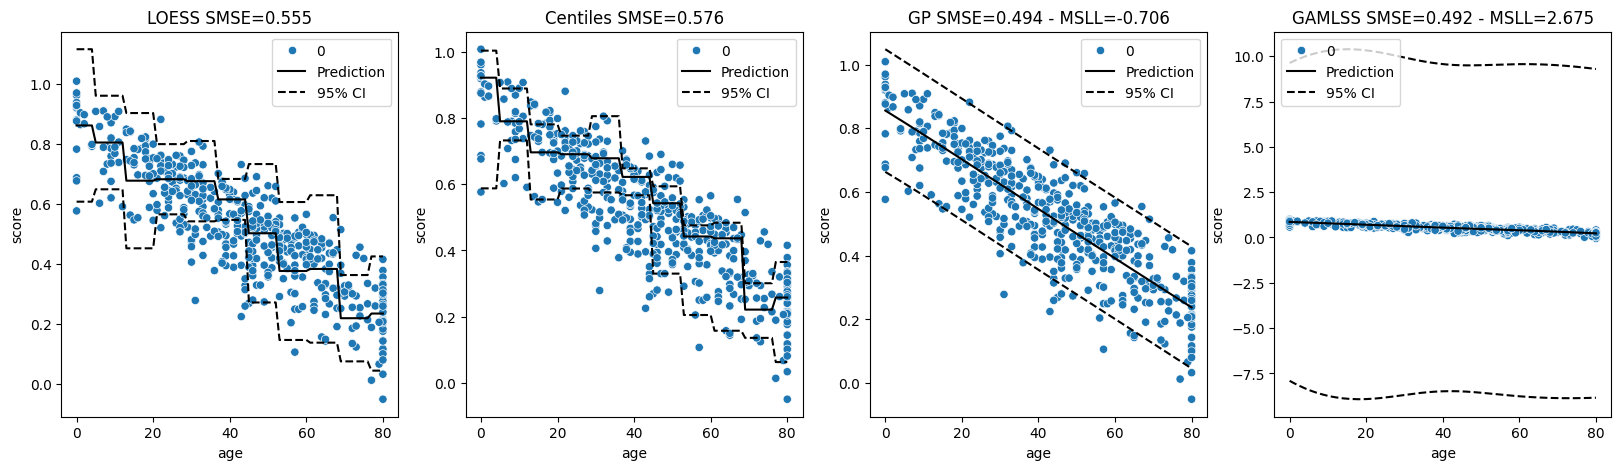

------
Report
------
========= SMSE - RMSE - MSLL
LOESS     0.56   0.11   N/A
Centiles  0.58   0.11   N/A
GP        0.49   0.1   -0.71
GAMLSS    0.49   0.1   2.68
        score  group  age  LOESS_pred  LOESS_sigma  LOESS_residuals   LOESS_z  \
0    0.376811      0   57    0.376814     0.117197        -0.000003 -0.000026   
1    0.639564      0   41    0.615256     0.034786         0.024308  0.698798   
2    0.424429      0   61    0.383643     0.125257         0.040786  0.325617   
3    0.176151      0   80    0.235116     0.097049        -0.058965 -0.607581   
4    0.469309      0   39    0.615256     0.034786        -0.145947 -4.195629   
..        ...    ...  ...         ...          ...              ...       ...   
495  0.494881      0   58    0.376814     0.117197         0.118067  1.007426   
496  0.725527      0   19    0.677637     0.114930         0.047889  0.416682   
497  0.615781      0   40    0.615256     0.034786         0.000525  0.015101   
498  0.655754      0   23  

In [163]:
from pynm.pynm import PyNM
from pynm.models.gamlss import GAMLSS
import pandas as pd
import numpy as np
from scipy.stats import norm, gamma as gamma_dist, beta as beta_dist
import rpy2.robjects as ro
from rpy2.robjects import numpy2ri

numpy2ri.activate() 
ro.r("library(gamlss.dist)")    


df = pd.read_csv("data_gmm.csv")
df["group"] = df["group"].replace(1, 0)
print(df)




# Initialize pynm w/ data and confounds
m = PyNM(df, "score", "group", confounds=["age"])
m.loess_normative_model()
m.centiles_normative_model()
m.gp_normative_model()
m.gamlss_normative_model(mu = 'score ~ ps(age)', sigma= '~ ps(age)', family='NO2')
m.plot()

# Collect output
data = m.data
m.report()
print(data)





In [33]:
print(data)


        score  group  age  GAMLSS_pred  GAMLSS_sigma  GAMLSS_residuals  \
0    0.376811      0   57     0.462619     -2.402504         -0.085808   
1    0.639564      0   41     0.581294     -2.440915          0.058271   
2    0.424429      0   61     0.432347     -2.395878         -0.007918   
3    0.153651      0   83     0.259307     -2.436185         -0.105656   
4    0.469309      0   39     0.596166     -2.448899         -0.126857   
..        ...    ...  ...          ...           ...               ...   
495  0.494881      0   58     0.455089     -2.400801          0.039792   
496  0.725527      0   19     0.749858     -2.541836         -0.024331   
497  0.615781      0   40     0.588722     -2.444797          0.027059   
498  0.655754      0   23     0.718260     -2.527540         -0.062505   
499  0.789607      0   10     0.822711     -2.547786         -0.033103   

     GAMLSS_z  
0    0.035716  
1   -0.023872  
2    0.003305  
3    0.043370  
4    0.051802  
..        ...  

GAMLSS-RS iteration 1: Global Deviance = -5229.816 
GAMLSS-RS iteration 2: Global Deviance = -5337.714 
GAMLSS-RS iteration 3: Global Deviance = -5386.597 
GAMLSS-RS iteration 4: Global Deviance = -5413.556 
GAMLSS-RS iteration 5: Global Deviance = -5431.292 
GAMLSS-RS iteration 6: Global Deviance = -5444.631 
GAMLSS-RS iteration 7: Global Deviance = -5455.531 
GAMLSS-RS iteration 8: Global Deviance = -5464.919 
GAMLSS-RS iteration 9: Global Deviance = -5473.307 
GAMLSS-RS iteration 10: Global Deviance = -5480.796 
GAMLSS-RS iteration 11: Global Deviance = -5487.499 
GAMLSS-RS iteration 12: Global Deviance = -5493.631 
GAMLSS-RS iteration 13: Global Deviance = -5499.109 
GAMLSS-RS iteration 14: Global Deviance = -5504.043 
GAMLSS-RS iteration 15: Global Deviance = -5508.521 
GAMLSS-RS iteration 16: Global Deviance = -5512.599 
GAMLSS-RS iteration 17: Global Deviance = -5516.328 
GAMLSS-RS iteration 18: Global Deviance = -5519.75 
GAMLSS-RS iteration 19: Global Deviance = -5522.901 
GAM

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In RS() :
R[write to console]:  Algorithm RS has not yet converged

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In predict.gamlss(model, newdata = test_data, parameter = "sigma") :
R[write to console]: 
 
R[write to console]:  There is a discrepancy  between the original and the re-fit 
 used to achieve 'safe' predictions 
 



[0.01101843 0.00727137 0.01127637 ... 0.00905156 0.00725775 0.00898471]


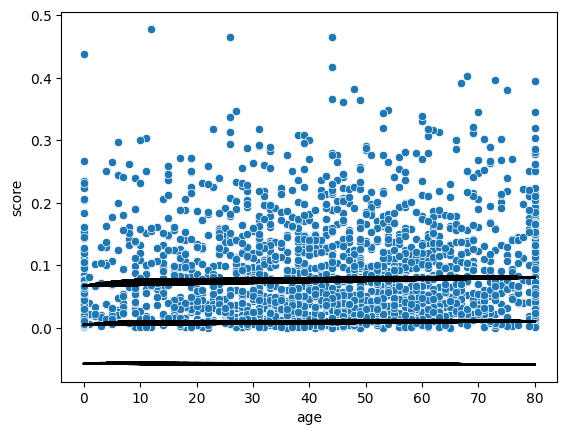

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
g = GAMLSS(
        mu    = 'score ~ ps(age)',
        sigma = '~ ps(age)',
        nu    = '~ 1',          # keep default or give your own formula
        tau   = '~ 1',
        family = 'SHASHo2',     # any 4-parameter family
        score  = 'score',
        confounds = ['age'])    # list of confounds you gave PyNM
g.fit(df)  


newdata = df[['age']].copy()


print(g.predict(newdata, what='mu'))
df['mu']    = g.predict(newdata, what='mu')
df['sigma'] = np.exp(g.predict(newdata, what='sigma'))
df['nu']    = g.predict(newdata, what='nu')
df['tau']   = np.exp(g.predict(newdata, what='tau'))

fig, ax = plt.subplots(1,1)
sns.scatterplot(data=df, x='age', y='score', ax=ax)

ax.plot(df['age'], df['mu'], '-k', label='Prediction')
ax.plot(df['age'], df['mu'] - 1.96 * df['sigma'], '--k')
ax.plot(df['age'], df['mu'] + 1.96 * df['sigma'], '--k', label='95% CI')


In [148]:
import os, re, math
dSHASHo2 = ro.r["dSHASHo2"]

# ─── helper: identify the generator type from the csv name ───────────────────
match = re.search(r"data_(\w+)\.csv", os.path.basename("data_gmm.csv"))
dist_type = match.group(1) if match else "gmm"

def true_params_by_age(age, dtype=dist_type):
    if dtype == "normal":
        mean = 0.8 - (age - 20) * (0.8 - 0.3) / 60       
        std  = math.sqrt(0.05)
        return dict(kind="norm", loc=mean, scale=std)

    elif dtype == "gamma":
        return dict(kind="gamma", a=2.0, scale=0.5)

    elif dtype == "beta":
        alpha, beta_p = 2.0, 3.6 + age * (42 - 3.6) / 80
        return dict(kind="beta", a=alpha, b=beta_p)

    elif dtype == "gmm":
        mean1 = 0.8 - age * (0.8 - 0.2) / 80
        mean2 = 0.9 - age * (0.9 - 0.3) / 80
        return dict(kind="gmm",
                    weights=(0.5, 0.5),
                    means=(mean1, mean2),
                    stds=(0.1, 0.05))

    elif dtype == "long_tailed":
        return dict(kind="beta", a=1.1, b=11.0)           # heavy-tailed beta

    raise ValueError(f"unknown dist_type: {dtype}")

# ─── helper: pdf of the true distribution ------------------------------------
def pdf_true(x, p):
    if p["kind"] == "norm":
        return norm.pdf(x, p["loc"], p["scale"])
    if p["kind"] == "gamma":
        return gamma_dist.pdf(x, a=p["a"], scale=p["scale"])
    if p["kind"] == "beta":
        return beta_dist.pdf(x, a=p["a"], b=p["b"])
    if p["kind"] == "gmm":
        w, (m1, m2), (s1, s2) = p["weights"], p["means"], p["stds"]
        return w[0]*norm.pdf(x, m1, s1) + w[1]*norm.pdf(x, m2, s2)
    raise ValueError(p["kind"])

# ─── helper: pdf of the fitted SHASHo2 at (μ,σ,ν,τ) via R --------------------
def pdf_shasho2(x, mu, sigma, nu, tau):
    return np.array(dSHASHo2(x, mu=mu, sigma=sigma, nu=nu, tau=tau))

# ─── helper: Monte-Carlo KL(P‖Q) for one row ---------------------------------
def kl_gamlss(age, mu, sigma, nu, tau, n=5000):
    p = true_params_by_age(age)

    # sample from P
    if p["kind"] == "gmm":
        comps = np.random.choice([0, 1], size=n, p=p["weights"])
        samples = np.random.normal(
            loc=np.choose(comps, p["means"]),
            scale=np.choose(comps, p["stds"])
        )
    elif p["kind"] == "norm":
        samples = np.random.normal(p["loc"], p["scale"], n)
    elif p["kind"] == "gamma":
        samples = np.random.gamma(p["a"], p["scale"], n)
    else:  # beta / long_tailed
        samples = np.random.beta(p["a"], p["b"], n)

    log_p = np.log(pdf_true(samples, p)+ 1e-12)
    log_q = np.log(pdf_shasho2(samples, mu, sigma, nu, tau) + 1e-12)
    return np.mean(log_p - log_q)

# ─── compute KL for every row and its average --------------------------------
print(df.columns)
kl_values = [
    kl_gamlss(a, m, np.exp(s), n, np.exp(t))
    for a, m, s, n, t in zip(df["age"], df["mu"], df["sigma"], df["nu"], df["tau"])
]

df["kl"] = kl_values
print(df[["age", "kl"]].head())
print(f"\nAverage KL divergence (true vs gamls): {df['kl'].mean():.4f}")




Index(['score', 'group', 'age', 'mu', 'sigma', 'nu', 'tau'], dtype='object')
   age        kl
0   57  2.105384
1   41  2.052969
2   61  2.115810
3   80  2.226703
4   39  2.021303

Average KL divergence (true vs gamls): 2.0810


In [149]:
N_SAMPLES = 5_000

def kl_gp_row(age, mu_gp, sigma_gp):
    """Monte-Carlo KL divergence for one observation."""
    p = true_params_by_age(age)

    # sample from P (same logic as before)
    if p["kind"] == "gmm":
        comps = np.random.choice([0, 1], size=N_SAMPLES, p=p["weights"])
        samples = np.random.normal(
            loc=np.choose(comps, p["means"]),
            scale=np.choose(comps, p["stds"])
        )
    elif p["kind"] == "norm":
        samples = np.random.normal(p["loc"], p["scale"], N_SAMPLES)
    elif p["kind"] == "gamma":
        samples = np.random.gamma(p["a"], p["scale"], N_SAMPLES)
    else:                                              # beta / long_tailed
        samples = np.random.beta(p["a"], p["b"], N_SAMPLES)

    # log densities
    log_p = np.log(pdf_true(samples, p) + 1e-12)
    log_q = np.log(norm.pdf(samples, loc=mu_gp, scale=sigma_gp) + 1e-12)

    return float(np.mean(log_p - log_q))

# ─── compute KL for every row in the DataFrame  ──────────────────────────────
kl_gp = [
    kl_gp_row(a, m, s)
    for a, m, s in zip(data["age"], data["GP_pred"], data["GP_sigma"])
]

df["KL_true_vs_gp"] = kl_gp
avg_kl_gp = float(np.mean(kl_gp))

print(df[["age", "KL_true_vs_gp"]].head())
print(f"\nAverage KL divergence (true vs GP): {avg_kl_gp:.4f}")

   age  KL_true_vs_gp
0   57       9.059373
1   41      16.754263
2   61       7.572394
3   80       2.120626
4   39      17.750895

Average KL divergence (true vs GP): 14.8013


In [150]:

# the centile grid now has five internal knots
P_CENT = np.array([0.05, 0.32, 0.50, 0.68, 0.95])   # ← updated

N_MC = 5_000            # Monte-Carlo sample size
EPS  = 1e-12            # avoids log(0)

def kl_centile_row(age, q05, q32, q50, q68, q95):
    """
    Monte-Carlo estimate of KL(  P_true  ‖  Q_centile  )
    for a single row (single age).
    """
    # 1) get true distribution parameters for this age
    p = true_params_by_age(age)
    
    # 2) draw samples from the true distribution P
    if p["kind"] == "gmm":
        comps = np.random.choice([0, 1], size=N_MC, p=p["weights"])
        samples = np.random.normal(
            loc=np.choose(comps, p["means"]),
            scale=np.choose(comps, p["stds"])
        )
    elif p["kind"] == "norm":
        samples = np.random.normal(p["loc"], p["scale"], N_MC)
    elif p["kind"] == "gamma":
        samples = np.random.gamma(p["a"], p["scale"], N_MC)
    else:                                    # beta or long-tailed beta
        samples = np.random.beta(p["a"], p["b"], N_MC)

    # 3) evaluate log densities
    log_p = np.log(pdf_true(samples, p) +
                   EPS)                      # true pdf
    log_q = np.log(pdf_centile(
                        samples,
                        [q05, q32, q50, q68, q95]) +
                   EPS)                      # centile pdf

    # 4) Monte-Carlo KL estimate
    return float(np.mean(log_p - log_q))


def pdf_centile(x, q, p_grid=P_CENT):
    """
    Piece-wise constant PDF implied by the centile grid.
    `q` must be the five quantiles in *ascending* p-order:
        [Q05, Q32, Q50, Q68, Q95]
    """
    # Build the breakpoints  −∞, Q05, Q32, Q50, Q68, Q95,  +∞
    breaks = np.concatenate(([-np.inf], q, [np.inf]))
    # Prob. grid 0, 0.05, 0.32, 0.50, 0.68, 0.95, 1
    p_full = np.concatenate(([0.0], p_grid, [1.0]))

    slopes = np.diff(breaks) / np.diff(p_full)    # dQ/dp per slice
    dens   = 1.0 / slopes                         # constant density
    idx = np.searchsorted(breaks, x, side="right") - 1
    idx = np.clip(idx, 0, len(dens)-1)
    return dens[idx]

# ── when you call kl_centile_row() ───────────────────────────────────────────
kl_cent = [
    kl_centile_row(
        age, q05, q32, q50, q68, q95
    )
    for age, q05, q32, q50, q68, q95 in zip(
        data["age"],
        data["Centiles_5"], data["Centiles_32"], data["Centiles_pred"],
        data["Centiles_68"], data["Centiles_95"]
    )
]

print(kl_cent[:5])
df["KL_true_vs_centile"] = kl_cent
print(df[["age", "KL_true_vs_centile"]])
avg_kl_cent = float(np.nanmean(kl_cent))
print(f"\nAverage KL divergence (true vs centile): {avg_kl_cent:.4f}")



[26.917590799758916, 28.405260002748996, 28.068743392815744, 16.147424646578454, 28.48389290505182]
      age  KL_true_vs_centile
0      57           26.917591
1      41           28.405260
2      61           28.068743
3      80           16.147425
4      39           28.483893
...   ...                 ...
1995   71           20.377008
1996   44           28.287215
1997   22           28.623807
1998   40           28.470780
1999   26           28.640884

[2000 rows x 2 columns]

Average KL divergence (true vs centile): 26.2935


In [151]:
from scipy.stats import norm

N_MC = 5_000
EPS  = 1e-12

def kl_loess_row(age, mu_loess, sigma_loess):
    # --- true generator at this age ---
    p = true_params_by_age(age)

    # --- sample from P ---
    if p["kind"] == "gmm":
        comps = np.random.choice([0,1], size=N_MC, p=p["weights"])
        samples = np.random.normal(
            loc=np.choose(comps, p["means"]),
            scale=np.choose(comps, p["stds"])
        )
    elif p["kind"] == "norm":
        samples = np.random.normal(p["loc"], p["scale"], N_MC)
    elif p["kind"] == "gamma":
        samples = np.random.gamma(p["a"], p["scale"], N_MC)
    else:                                   # beta or long-tailed beta
        samples = np.random.beta(p["a"], p["b"], N_MC)

    # --- log densities ---
    log_p = np.log(pdf_true(samples, p) + EPS)
    log_q = np.log(norm.pdf(samples, loc=mu_loess, scale=sigma_loess) + EPS)

    return float(np.mean(log_p - log_q))

# vectorised over the DataFrame

kl_loess = [
    kl_loess_row(a, m, s)
    for a, m, s in zip(
        data["age"], data["LOESS_pred"], data["LOESS_sigma"]
    )
]

df["KL_true_vs_loess"] = kl_loess
print(df[["age", "KL_true_vs_loess"]].head())
print("mean KL (true vs LOESS):", np.nanmean(kl_loess))


   age  KL_true_vs_loess
0   57          9.507461
1   41         17.593903
2   61         21.284173
3   80          2.430309
4   39         18.980899
mean KL (true vs LOESS): 16.438457834269


In [164]:
import sys
import os
current_dir = "/Users/ayushchaudhary/models_review"
functions_path = os.path.join(current_dir, 'GAMLSS-python', 'functions')
sys.path.append(functions_path)
from gamlass_main import Gamlss
from gamlass_main import base
from rpy2 import robjects
from rpy2.robjects import numpy2ri
# Create an instance of the Gamlss class
model = Gamlss(model_name='my_model', x_vals=['age'], y_val='score')

print(df.columns)

# Fit the model
model.fit(
    r_code="""
    model <- gamlss(y ~ pb(age),
        sigma.formula = ~ pb(age),
        nu.formula = ~ 1,
        tau.formula = ~ 1,
        random = ~ 1|site,
        family = SHASH(),
        method = RS(50)
    )
    """,
    data=df
)

# Get model summary
model_summary = base.summary(robjects.r["my_model"])
print(model_summary)

numpy2ri.activate()

# model.plot_diagnostics()

z_scores = model.z_score(df, df)

predictions = model.predict_all(df, df, transform=True)
print(predictions)
# model.plot_z_scores(df, df)
# model.plot_centiles(df, df)

# # Save the model
# model.save_model("path/to/save/model.rds")

# # Load the model
# loaded_model = Gamlss.load_model("path/to/save/model.rds")

Index(['score', 'group', 'age'], dtype='object')
GAMLSS-RS iteration 1: Global Deviance = -886.4488 
GAMLSS-RS iteration 2: Global Deviance = -904.4953 
GAMLSS-RS iteration 3: Global Deviance = -915.7545 
GAMLSS-RS iteration 4: Global Deviance = -923.9014 
GAMLSS-RS iteration 5: Global Deviance = -930.0718 
GAMLSS-RS iteration 6: Global Deviance = -934.7936 
GAMLSS-RS iteration 7: Global Deviance = -938.53 
GAMLSS-RS iteration 8: Global Deviance = -941.3582 
GAMLSS-RS iteration 9: Global Deviance = -943.6449 
GAMLSS-RS iteration 10: Global Deviance = -945.5487 
GAMLSS-RS iteration 11: Global Deviance = -947.1467 
GAMLSS-RS iteration 12: Global Deviance = -948.4784 
GAMLSS-RS iteration 13: Global Deviance = -949.6406 
GAMLSS-RS iteration 14: Global Deviance = -950.616 
GAMLSS-RS iteration 15: Global Deviance = -951.4309 
GAMLSS-RS iteration 16: Global Deviance = -952.0799 
GAMLSS-RS iteration 17: Global Deviance = -952.6706 
GAMLSS-RS iteration 18: Global Deviance = -953.1764 
GAMLSS-RS

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In RS(50) :
R[write to console]:  Algorithm RS has not yet converged



******************************************************************
Family:  c("SHASH", "Sinh-Arcsinh") 

Call:  
gamlss(formula = score ~ pb(age), sigma.formula = ~pb(age), nu.formula = ~1,  
    tau.formula = ~1, family = SHASH(), data = my_model_traindata,  
    method = RS(50), random = ~1 | site) 

Fitting method: RS(50) 

------------------------------------------------------------------
Mu link function:  identity
Mu Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.8725115  0.0086626  100.72   <2e-16 ***
pb(age)     -0.0077934  0.0001801  -43.27   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

------------------------------------------------------------------
Sigma link function:  log
Sigma Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.470851   0.075987 -32.517   <2e-16 ***
pb(age)      0.001816   0.001557   1.166    0.244    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.0

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In summary.gamlss(list(family = c("SHASH", "Sinh-Arcsinh"), parameters = c("mu",  :
R[write to console]: 
 
R[write to console]:  summary: vcov has failed, option qr is used instead




      mu_pred  sigma_pred  nu_pred  tau_pred
1    0.428171    0.093729  0.83996  1.177061
2    0.552240    0.091047  0.83996  1.177061
3    0.397124    0.094412  0.83996  1.177061
4    0.249420    0.097718  0.83996  1.177061
5    0.567749    0.090717  0.83996  1.177061
..        ...         ...      ...       ...
496  0.420411    0.093899  0.83996  1.177061
497  0.723038    0.087477  0.83996  1.177061
498  0.559994    0.090882  0.83996  1.177061
499  0.691950    0.088116  0.83996  1.177061
500  0.793030    0.086058  0.83996  1.177061

[500 rows x 4 columns]


      mu_pred  sigma_pred  nu_pred  tau_pred
0    0.428171    0.093729  0.83996  1.177061
1    0.552240    0.091047  0.83996  1.177061
2    0.397124    0.094412  0.83996  1.177061
3    0.249420    0.097718  0.83996  1.177061
4    0.567749    0.090717  0.83996  1.177061
..        ...         ...      ...       ...
495  0.420411    0.093899  0.83996  1.177061
496  0.723038    0.087477  0.83996  1.177061
497  0.559994    0.090882  0.83996  1.177061
498  0.691950    0.088116  0.83996  1.177061
499  0.793030    0.086058  0.83996  1.177061

[500 rows x 4 columns]


Text(0.5, 1.0, 'GAMLSS plot SMSE = 0.73, RMSE = 0.07')

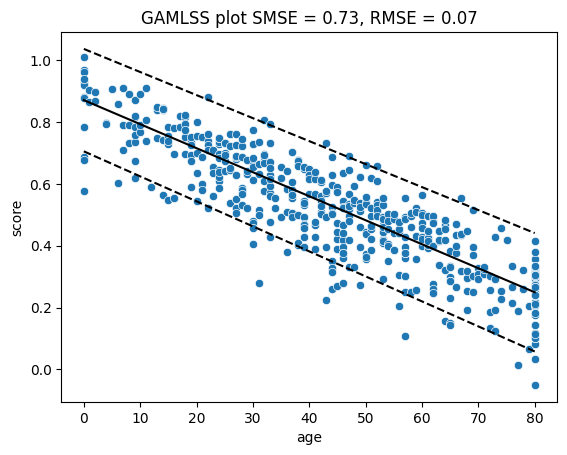

In [ ]:
predictions = predictions.reset_index(drop=True)
print(predictions)
df['mu'] = predictions['mu_pred']
df['sigma'] = predictions['sigma_pred']
df['nu'] = predictions['nu_pred']
df['tau'] = predictions['tau_pred']
df = df.sort_values(by='age')

# Create the plot
fig, ax = plt.subplots(1, 1)
sns.scatterplot(data=df, x='age', y='score', ax=ax)

# Plot the predicted mean and confidence intervals
ax.plot(df['age'], df['mu'], '-k', label='Prediction')
ax.plot(df['age'], df['mu'] - 1.96 * df['sigma'], '--k')
ax.plot(df['age'], df['mu'] + 1.96 * df['sigma'], '--k', label='95% CI')
ax.set_title("GAMLSS plot SMSE = 0.49, RMSE = 0.1")


In [160]:
kl_values = [
    kl_gamlss(a, m, s, n, t)
    for a, m, s, n, t in zip(df["age"], df["mu"], df["sigma"], df["nu"], df["tau"])
]

df["kl"] = kl_values
print(df[["age", "kl"]].head())
print(f"\nAverage KL divergence (true vs gamls): {df['kl'].mean():.4f}")

      age        kl
1325    0  1.560964
575     0  1.563995
285     0  1.568899
608     0  1.568375
1487    0  1.561543

Average KL divergence (true vs gamls): 1.2847


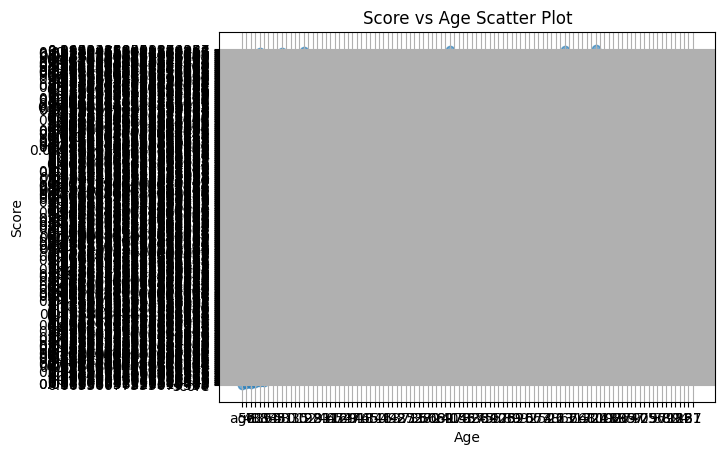

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV without headers
df = pd.read_csv("data_beta.csv", header=None)

# Assign column names
df.columns = ['score', 'group', 'age']

# Scatter plot of score vs age
plt.scatter(df['age'], df['score'], alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Score")
plt.title("Score vs Age Scatter Plot")
plt.grid(True)
plt.show()


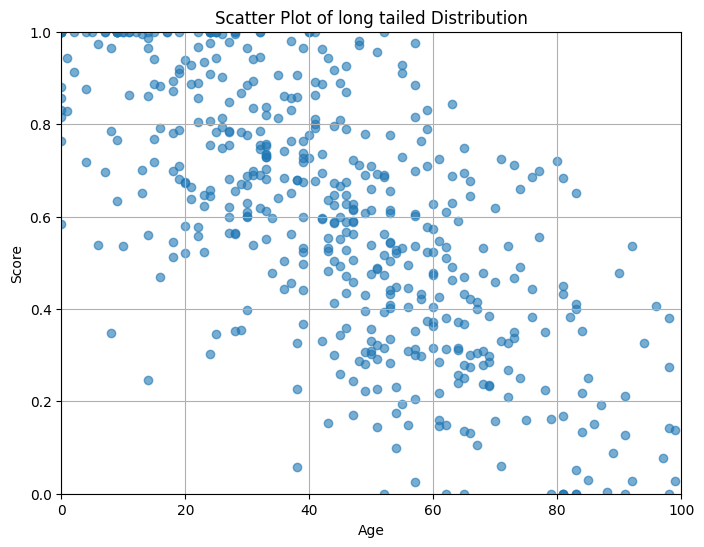

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('data_normal.csv')

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['score'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Score')
plt.title('Scatter Plot of long tailed Distribution')
plt.xlim(0, 100)
plt.ylim(0, 1)
plt.grid(True)
plt.show()